In [100]:
%reload_ext autoreload
%autoreload 2


In [101]:
import numpy as np
from load_data import load
from counter import var_counter
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import PercentFormatter
import random
from scipy.stats import norm

In [102]:
#loading data from raw data files, no specificed path goes to V2 directory
[xcoord, ycoord, array4D]=load()

In [103]:
#stats accroos members
#computing mean and min-max ranges

[member_mean, member_max, member_min]=[np.mean(array4D,axis=0), np.amax(array4D,axis=0), np.amin(array4D,axis=0)]

In [104]:
#add test to checks tability of results (should always be the same) 
mean_over=var_counter(member_mean,20)
max_over=var_counter(member_max,20)
min_over=var_counter(member_min,10)

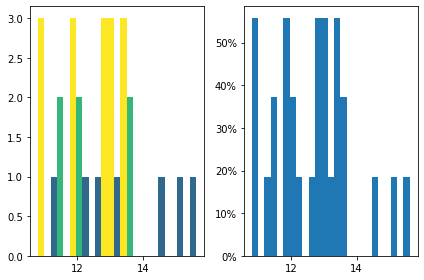

In [105]:
#plotting values across 28 mmbers (1 location, 1 month)
month=random.randint(0,len(array4D[0,:,0,0])-1)
xloc=random.randint(0,len(array4D[0,0,:,0])-1)
yloc=random.randint(0,len(array4D[0,0,0,:])-1)

vars=array4D[:,month,xloc,yloc]

ysort=np.sort(vars)
s=np.std(array4D)
m=np.mean(array4D)


'plotting'
fig, axs = plt.subplots(1, 2, tight_layout=True)

n_bins = 25
axs[0].hist(ysort, bins=n_bins)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(ysort, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(ysort, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))


In [108]:
#Computing mean and std dev across members for each point in space and time
sarray=np.std(array4D,0)

#computing p90 value 
array90=np.percentile(array4D, 90, axis=0)
